In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [50]:
 np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [51]:
df=pd.read_csv(r"../data/attrition_data.csv")
df.drop(['TERMINATION_YEAR'], axis = 1, inplace=True)
df.drop(['EMP_ID'], axis = 1, inplace=True)
df.drop(['ANNUAL_RATE'], axis = 1, inplace=True)
df.drop(['REFERRAL_SOURCE'], axis = 1, inplace=True)
df=df.replace({'STATUS': {'T': 1, 'A': 0}})

In [52]:
x=df.drop(['STATUS'], axis=1)
y=df['STATUS']

In [53]:
x = pd.get_dummies(x, columns=['ETHNICITY', 'SEX', 'MARITAL_STATUS', 'NUMBER_OF_TEAM_CHANGED', 'HIRE_MONTH', 'IS_FIRST_JOB', 'TRAVELLED_REQUIRED', 'DISABLED_EMP', 'DISABLED_VET', 'JOB_GROUP'])

In [54]:
to_be_label_encoded = ['JOBCODE', 'JOB_SATISFACTION', 'PERFORMANCE_RATING','EDUCATION_LEVEL']
label_encoder = LabelEncoder()
for column in to_be_label_encoded:
    x[column] = label_encoder.fit_transform(x[column])

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.60, random_state=42)

In [62]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.7425450762829403


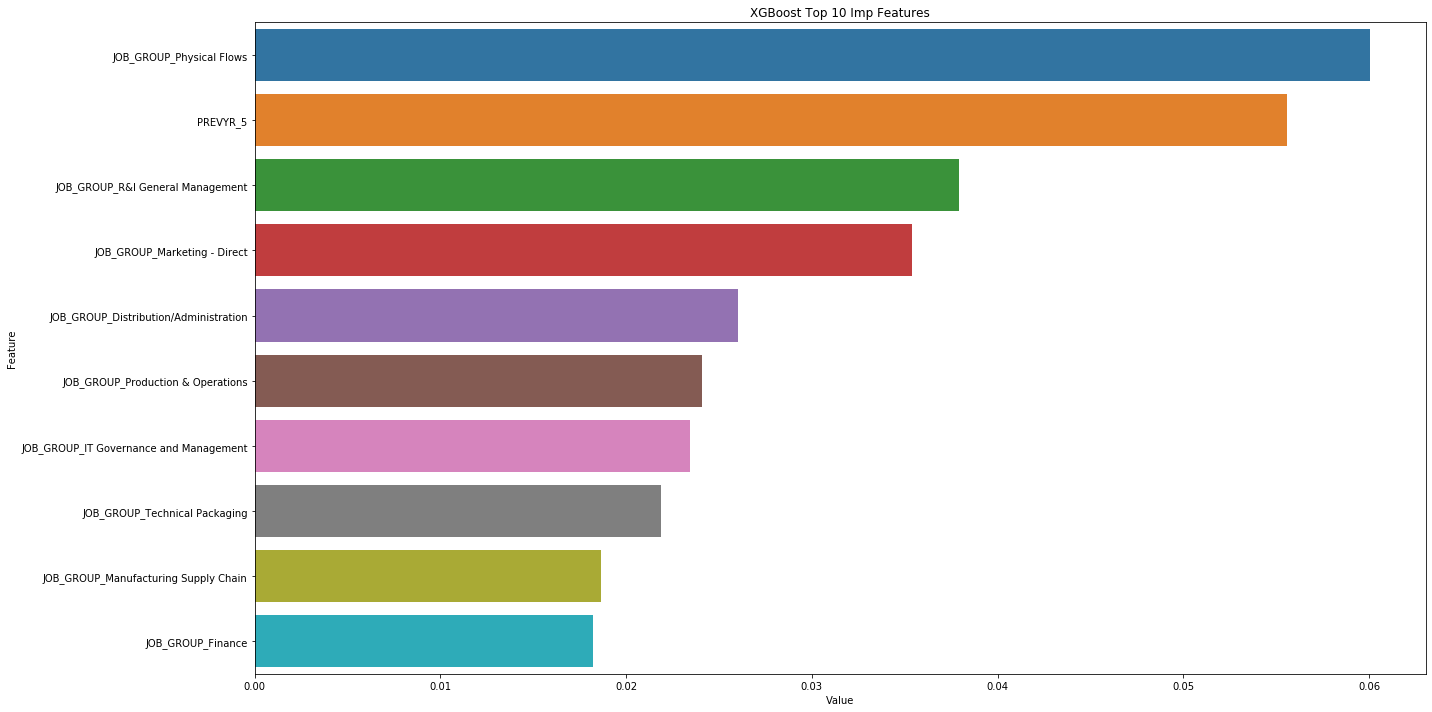

In [63]:
feature_imp = pd.DataFrame(sorted(zip(xgb_model.feature_importances_,x.columns)), columns=['Value','Feature'])
feature_imp_top_10 = feature_imp.sort_values(by = 'Value',ascending=False).reset_index(drop=True)[:10]
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp_top_10)
plt.title('XGBoost Top 10 Imp Features')
plt.tight_layout()
plt.show()

In [64]:
y_pred_prob = xgb_model.predict_proba(x_test)[:, 1]

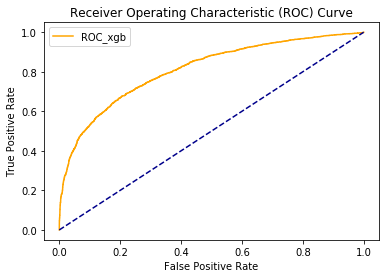

In [65]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()


fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='orange', label='ROC_xgb')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')


# fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_prob_lr)
# auc = metrics.roc_auc_score(y_test, y_pred_prob)
# plt.plot(fpr, tpr, color='red', label='ROC_lr')

plt.legend(loc=0)

In [66]:
confusion_matrix(y_test, y_pred)

array([[2611,  599],
       [ 886, 1672]])